<h1> LAB 1 <h2>


<h2>Learning NumPy<h2>


In [1]:
import numpy 
numpy.version.full_version


'1.14.3'

In [2]:
from numpy import *

In [3]:
import numpy as np
a=np.array([0,1,2,3,4,5])
a

array([0, 1, 2, 3, 4, 5])

In [4]:
a.ndim

1

In [5]:
a.shape

(6,)

In [6]:
b=a.reshape((3,2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [7]:
b.ndim

2

In [8]:
b.shape

(3, 2)

In [9]:
b[1][0]=77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [10]:
a

array([ 0,  1, 77,  3,  4,  5])

In [11]:
c=a.reshape((3,2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [12]:
c[0][0]=-99
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [13]:
a

array([ 0,  1, 77,  3,  4,  5])

In [14]:
d=np.array([1,2,3,4,5])
d*2

array([ 2,  4,  6,  8, 10])

In [15]:
d**2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [16]:
[1,2,3,4,5]*2


[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [17]:
[1,2,3,4,5]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

<h2>Indexing<h2>


In [18]:
a[np.array([2,3,4])]


array([77,  3,  4])

In [19]:
a>4

array([False, False,  True, False, False,  True])

In [20]:
a[a>4]


array([77,  5])

In [21]:
a[a>4]=4
a

array([0, 1, 4, 3, 4, 4])

In [22]:
a.clip(0,4)



array([0, 1, 4, 3, 4, 4])

<h2> Handling nonexisting value <h2>


In [23]:
c=np.array([1,2,np.NAN,3,4]) #oretend we've read this from a textfile
c

array([ 1.,  2., nan,  3.,  4.])

In [24]:
np.isnan(c)

array([False, False,  True, False, False])

In [25]:
c[~np.isnan(c)]


array([1., 2., 3., 4.])

In [26]:
np.mean(c[~np.isnan(c)])

2.5

<h2> Comparing the runtime <h2>


In [27]:
import timeit
normal_py_sec=timeit.timeit('sum(x*x for x in range(1000))', number=10000)
naive_np_sec=timeit.timeit('sum(na*na)',
                          setup="import numpy as np; na=np.arange(1000)",
                          number=10000)
good_np_sec=timeit.timeit('na.dot(na)',
                         setup="import numpy as np; na=np.arange(1000)",
                         number=10000)
print("normal python: %f sec"%normal_py_sec)
print("Naive NumPY: %f sec"%naive_np_sec)
print("good NumPy: %f sec "%good_np_sec)


normal python: 2.128823 sec
Naive NumPY: 2.153266 sec
good NumPy: 0.029890 sec 


In [28]:
a=np.array([1,2,3])
a.dtype

dtype('int32')

In [29]:
np.array([1,"stringy"])


array(['1', 'stringy'], dtype='<U11')

In [30]:
np.array([1,"stringy",set([1,2,3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

<h2> Learning SciPy <h2>


In [31]:
import scipy,numpy
scipy.version.full_version

'1.1.0'

In [32]:
scipy.dot is numpy.dot

True

<h2> 1st Tiny App on ML <h2>
<h3> Reading in the data <h3>

In [33]:
import scipy as sp
data=sp.genfromtxt("https://raw.githubusercontent.com/luispedro/BuildingMachineLearningSystemsWithPython/master/ch01/data/web_traffic.tsv", delimiter="\t")
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [34]:
print(data.shape)

(743, 2)


<h3> Preprocessing and cleaning the data <h3>

In [35]:
x=data[:,0]
y=data[:,1]
sp.sum(sp.isnan(y))

8

<function matplotlib.pyplot.show(*args, **kw)>

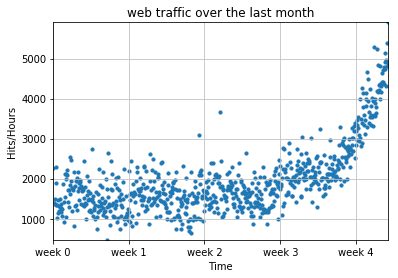

In [50]:
x=x[~sp.isnan(y)]
y=y[~sp.isnan(y)]
import matplotlib.pyplot as plt
# plot the (x,y) points wiht dots of size 10
plt.scatter(x,y,s=10)
plt.title("web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/Hours")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
#draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show


<h3> Choosing the right model and learning algorithm <h3>

In [37]:
def error(f,x,y):
    return sp.sum((f(x)-y)**2)
fp1, residuals, rank, sv, rcond=sp.polyfit(x,y,1,full=True)
print("Model parameters: %s"%fp1)

Model parameters: [  2.59619213 989.02487106]


In [38]:
print(residuals)

[3.17389767e+08]


In [39]:
f1=sp.poly1d(fp1)
print(error(f1,x,y))


317389767.33977807


<function matplotlib.pyplot.show(*args, **kw)>

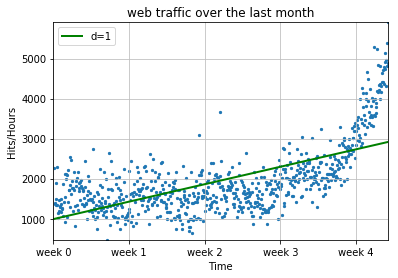

In [40]:
x=x[~sp.isnan(y)]
y=y[~sp.isnan(y)]
import matplotlib.pyplot as plt
# plot the (x,y) points wiht dots of size 10
plt.scatter(x,y,s=5)
plt.title("web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/Hours")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
#draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
fx=sp.linspace(0,x[-1],1000) #generate x-values for plotting
l1 = plt.plot(fx,f1(fx))
plt.setp(l1, linewidth=2, color='g')
plt.legend(["d=%i"%f1.order], loc="upper left")
plt.show


<h2> Towards some advanced stuff </h2>


In [41]:
f2p=sp.polyfit(x,y,2)
print(f2p)

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [42]:
f2=sp.poly1d(f2p)
print(error(f2,x,y))


179983507.8781792


<function matplotlib.pyplot.show(*args, **kw)>

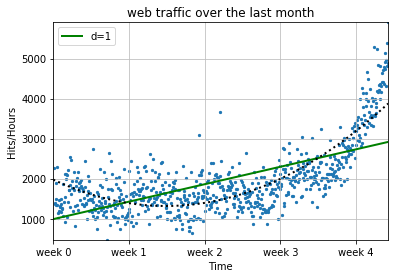

In [43]:
x=x[~sp.isnan(y)]
y=y[~sp.isnan(y)]
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
# plot the (x,y) points wiht dots of size 10
plt.scatter(x,y,s=5)
plt.title("web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/Hours")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
#draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')

fx=sp.linspace(0,x[-1],1000) #generate x-values for plotting
#degree-1
l1 = plt.plot(fx,f1(fx))
plt.setp(l1, linewidth=2, color='g')
plt.legend(["d=%i"%f1.order], loc="upper left")

#degree-2
l2 = plt.plot(fx,f2(fx),linestyle=':', label="d=%i"%f2.order)
plt.setp(l2, linewidth=2, color='000')
plt.show

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RankWarning: Polyfit may be poorly conditioned


Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363548
Error d=53: 109452415.025546


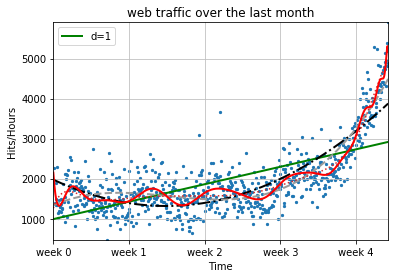

In [44]:
x=x[~sp.isnan(y)]
y=y[~sp.isnan(y)]
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
# plot the (x,y) points wiht dots of size 10
plt.scatter(x,y,s=5)
plt.title("web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/Hours")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
#draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')

fx=sp.linspace(0,x[-1],1000) #generate x-values for plotting
#degree-1
l1 = plt.plot(fx,f1(fx))
plt.setp(l1, linewidth=2, color='g')
plt.legend(["d=%i"%f1.order], loc="upper left")


#degree-2
l2 = plt.plot(fx,f2(fx),linestyle='-.', label="d=%i"%f2.order)
plt.setp(l2, linewidth=2, color='000')


#degree-3
f3p=sp.polyfit(x,y,3)
f3=sp.poly1d(f3p)
l3=plt.plot(fx,f3(fx), linestyle='--')
plt.setp(l3, linewidth=2, color='b')

#degree-10
f10p=sp.polyfit(x,y,10)
f10=sp.poly1d(f10p)
l10=plt.plot(fx,f10(fx), linestyle=':')
plt.setp(l3, linewidth=2, color='101')

#degree-53
f53p=sp.polyfit(x,y,53)
f53=sp.poly1d(f53p)
l53=plt.plot(fx,f53(fx), linestyle='-')
plt.setp(l53, linewidth=2, color='r')
plt.show

print("Error d=1: %f" %error(f1,x,y))
print("Error d=2: %f"%error(f2,x,y))
print("Error d=3: %f"%error(f3,x,y))
print("Error d=10: %f"%error(f10,x,y))
print("Error d=53: %f"%error(f53,x,y))


<h2> Stepping back to go forward - another look at our data </h2>

<h3> Separating the data and traininfg two lines usind week 3.5 as separation point </h3>

In [45]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point 
ya = y[:inflection] 
xb = x[inflection:] # data after
yb = y[inflection:]
fa = sp.poly1d(sp.polyfit(xa, ya, 1)) 
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya) 
fb_error = error(fb, xb, yb) 
print("Error inflection=%f" % (fa_error + fb_error)) 

Error inflection=132950348.197616


<function matplotlib.pyplot.show(*args, **kw)>

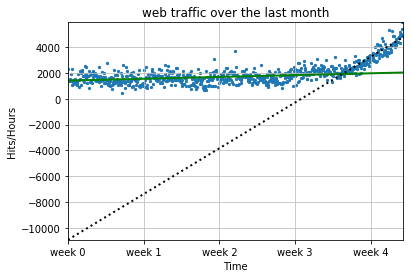

In [46]:
x=x[~sp.isnan(y)]
y=y[~sp.isnan(y)]
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
# plot the (x,y) points wiht dots of size 10
plt.scatter(x,y,s=5)
plt.title("web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/Hours")
plt.xticks([w*7*24 for w in range(10)],
          ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
#draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')

fx=sp.linspace(0,x[-1],1000) #generate x-values for plotting

#fa

la=plt.plot(fx,fa(fx), linestyle='-')
plt.setp(la, linewidth=2, color='g')

#fb

lb=plt.plot(fx,fb(fx), linestyle=':')
plt.setp(lb, linewidth=2, color='000')
plt.show


In [47]:
fbt2=sp.poly1d(sp.polyfit(xb[:700],yb[:700],2))
print("fbt2(x)= \n%s" %fbt2)

fbt2(x)= 
         2
0.07893 x - 84.69 x + 2.437e+04


In [48]:
print("fbt2(x)-100,000= \n%s" %(fbt2-100000))

fbt2(x)-100,000= 
         2
0.07893 x - 84.69 x - 7.563e+04


In [49]:
from scipy.optimize import fsolve
reached_max=fsolve(fbt2-100000,x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" %reached_max[0])

100,000 hits/hour expected at week 9.837964
